## Importing Packages

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import multiprocessing

from sklearn.model_selection import train_test_split # data split
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm
from sklearn.svm import SVC # SVM algorithm
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree 

from sklearn.metrics import confusion_matrix, classification_report # evaluation metric
from sklearn.metrics import accuracy_score # evaluation metric
from sklearn.metrics import f1_score # evaluation metric
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import cross_val_score
from keras.utils import to_categorical

from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from keras import models
from keras.layers import Dense,Dropout

## Data Analysis

In [2]:
df = pd.read_csv('student-mat.csv')
df1=pd.read_csv("student-por.csv")
pd.set_option('display.max_rows',None)
df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
frames=[df,df1]
df = pd.concat(frames)

In [4]:
df.shape

(1044, 33)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher   

In [6]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [7]:
#all column names are self-explanatory and well-named, hence no renaming required.
#drop duplicates if necessary
df = df.drop_duplicates()
df.nunique()


school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      35
G1            18
G2            17
G3            19
dtype: int64

### Assigning Grades

In [8]:
#Data Mining
#calculate avergae of 3 grades
df['GAvg'] = (df['G1'] + df['G2'] + df['G3']) / 3

In [9]:
df.GAvg.describe(percentiles=[0.2,0.4,0.6,0.8])

count    1044.000000
mean       11.267241
std         3.218805
min         1.333333
20%         9.000000
40%        10.666667
50%        11.333333
60%        12.333333
80%        14.000000
max        19.333333
Name: GAvg, dtype: float64

In [10]:
#assign grades

def define_grade(df):
    # Create a list to store the data
    grades = []

    # For each row in the column,
    for row in df['GAvg']:
        # if more than a value,
        if row >= 14:
            # Append a letter grade
            grades.append('A')
        elif row >= 12.3:
            # Append a letter grade
            grades.append('B')
        elif row >= 10.60:
            # Append a letter grade
            grades.append('C')
            # else, if more than a value,
        elif row >= 9:
            # Append a letter grade
            grades.append('D')
        # else, if more than a value,
        elif row < 9:
            # Append a letter grade
            grades.append('E')   
    # Create a column from the list
    df['grades'] = grades
    return df

#run fn on df
df = define_grade(df)
df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,GAvg,grades
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,5.666667,E
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,4,5,5,6,5.333333,E
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,10,7,8,10,8.333333,E
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,2,15,14,15,14.666667,A
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,4,6,10,10,8.666667,E


In [11]:
df1=df
df1.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,GAvg,grades
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,5.666667,E
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,4,5,5,6,5.333333,E
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,10,7,8,10,8.333333,E
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,2,15,14,15,14.666667,A
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,4,6,10,10,8.666667,E


In [12]:
col= df1.columns
dft=df1.dtypes

In [13]:
dft

school         object
sex            object
age             int64
address        object
famsize        object
Pstatus        object
Medu            int64
Fedu            int64
Mjob           object
Fjob           object
reason         object
guardian       object
traveltime      int64
studytime       int64
failures        int64
schoolsup      object
famsup         object
paid           object
activities     object
nursery        object
higher         object
internet       object
romantic       object
famrel          int64
freetime        int64
goout           int64
Dalc            int64
Walc            int64
health          int64
absences        int64
G1              int64
G2              int64
G3              int64
GAvg          float64
grades         object
dtype: object

In [14]:
print(dft.shape)

(35,)


### Encoding object type columns

In [15]:
object_cols_uno=['school', 'sex', 'address', 'famsize','Pstatus', 'schoolsup','famsup', 'paid','activities','nursery', 'higher','internet', 'romantic' ,'grades' ]
le = LabelEncoder()

for i in object_cols_uno:
    df1[i] = le.fit_transform(df1[i])

In [16]:
df1

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,GAvg,grades
0,0,0,18,1,0,0,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,5.666667,4
1,0,0,17,1,0,1,1,1,at_home,other,...,3,1,1,3,4,5,5,6,5.333333,4
2,0,0,15,1,1,1,1,1,at_home,other,...,2,2,3,3,10,7,8,10,8.333333,4
3,0,0,15,1,0,1,4,2,health,services,...,2,1,1,5,2,15,14,15,14.666667,0
4,0,0,16,1,0,1,3,3,other,other,...,2,1,2,5,4,6,10,10,8.666667,4
5,0,1,16,1,1,1,4,3,services,other,...,2,1,2,5,10,15,15,15,15.000000,0
6,0,1,16,1,1,1,2,2,other,other,...,4,1,1,3,0,12,12,11,11.666667,2
7,0,0,17,1,0,0,4,4,other,teacher,...,4,1,1,1,6,6,5,6,5.666667,4
8,0,1,15,1,1,0,3,2,services,other,...,2,1,1,1,0,16,18,19,17.666667,0
9,0,1,15,1,0,1,3,4,other,other,...,1,1,1,5,0,14,15,15,14.666667,0


### Heatmap of numeric data

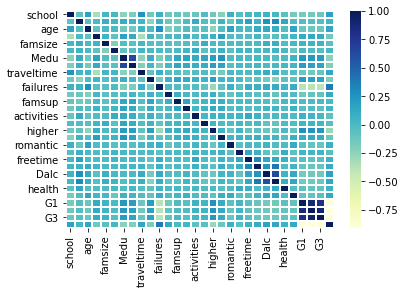

In [17]:
numeric_cols=['school', 'sex', 'age', 'address', 'famsize','Pstatus','Medu','Fedu','traveltime','studytime','failures', 'schoolsup','famsup', 'paid','activities','nursery', 'higher','internet', 'romantic','famrel','freetime','goout','Dalc','Walc','health','absences','G1','G2','G3', 'grades']
sns.heatmap(df1[numeric_cols].corr(),fmt='.3g',cmap="YlGnBu",linewidths=1)
plt.show()


### Handling unordered object type data cols

In [19]:
#'Mjob','Fjob','reason' 'guardian'
multi_cat = ['Mjob','Fjob','reason', 'guardian']

for cat in multi_cat:
    dummies = pd.get_dummies(df1[cat], prefix=cat, drop_first=True)
    df1 = pd.concat([df1, dummies], axis=1)
    # Drop corresponding categorical variable as we have created the dummies for it
    df1.drop([cat], axis = 1, inplace = True)

KeyError: 'Mjob'

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 648
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   school             1044 non-null   int32  
 1   sex                1044 non-null   int32  
 2   age                1044 non-null   int64  
 3   address            1044 non-null   int32  
 4   famsize            1044 non-null   int32  
 5   Pstatus            1044 non-null   int32  
 6   Medu               1044 non-null   int64  
 7   Fedu               1044 non-null   int64  
 8   traveltime         1044 non-null   int64  
 9   studytime          1044 non-null   int64  
 10  failures           1044 non-null   int64  
 11  schoolsup          1044 non-null   int32  
 12  famsup             1044 non-null   int32  
 13  paid               1044 non-null   int32  
 14  activities         1044 non-null   int32  
 15  nursery            1044 non-null   int32  
 16  higher             1044 n

In [21]:
df1.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
0,0,0,18,1,0,0,4,4,2,2,...,0,0,0,0,1,0,0,0,1,0
1,0,0,17,1,0,1,1,1,1,2,...,0,0,1,0,0,0,0,0,0,0
2,0,0,15,1,1,1,1,1,1,2,...,0,0,1,0,0,0,1,0,1,0
3,0,0,15,1,0,1,4,2,1,3,...,0,0,0,1,0,1,0,0,1,0
4,0,0,16,1,0,1,3,3,1,2,...,0,0,1,0,0,1,0,0,0,0


### Visualizing Data
#### 1. Distribution of Final Grade

C:\Users\jyoti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


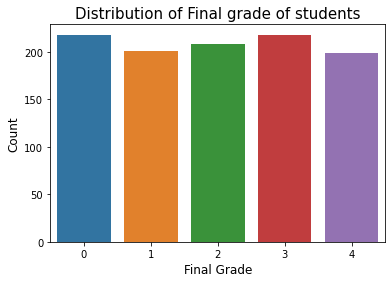

In [22]:
b = sns.countplot(df1['grades'])
b.axes.set_title('Distribution of Final grade of students', fontsize = 15)
b.set_xlabel('Final Grade', fontsize = 12)
b.set_ylabel('Count', fontsize = 12)
plt.show()


#### 2. Ditribution of Age 

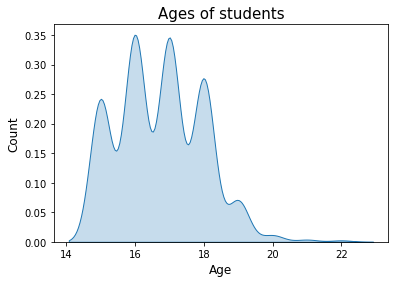

In [23]:
b = sns.kdeplot(df1['age'], shade=True)
b.axes.set_title('Ages of students', fontsize = 15)
b.set_xlabel('Age', fontsize = 12)
b.set_ylabel('Count', fontsize = 12)
plt.show()

#### 3. Number of students from Urban (1) and Rural (0) areas

C:\Users\jyoti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


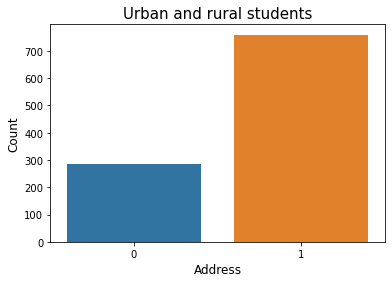

In [24]:
b = sns.countplot(df1['address'])
b.axes.set_title('Urban and rural students', fontsize = 15)
b.set_xlabel('Address', fontsize = 12)
b.set_ylabel('Count', fontsize = 12)
plt.show()

#### 4. Final Grade vs Number of Failures

C:\Users\jyoti\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 92.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jyoti\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 56.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jyoti\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 21.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jyoti\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


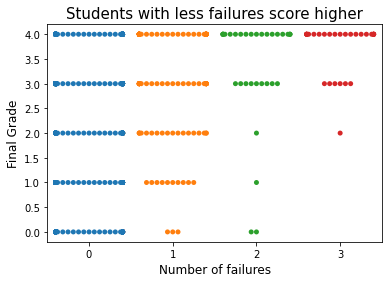

In [25]:
b = sns.swarmplot(x= df1['failures'],y=df1['grades'])
b.axes.set_title('Students with less failures score higher', fontsize = 15)
b.set_xlabel('Number of failures', fontsize = 12)
b.set_ylabel('Final Grade', fontsize = 12)
plt.show()

#### 5. Go out with friends Count

C:\Users\jyoti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


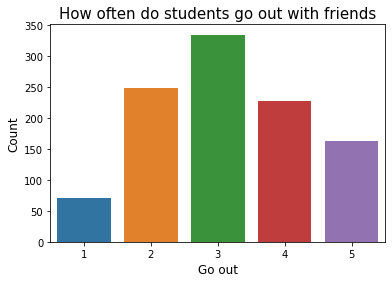

In [26]:
b = sns.countplot(df1['goout'])
b.axes.set_title('How often do students go out with friends', fontsize = 15)
b.set_xlabel('Go out', fontsize = 12)
b.set_ylabel('Count', fontsize = 12)
plt.show()

### Finding Correlation of all columns with 'Grades' column

In [27]:
df1.corr()['grades'].sort_values() 

GAvg                -0.933013
G1                  -0.911689
G2                  -0.894887
G3                  -0.866764
higher              -0.280937
Medu                -0.235811
Fedu                -0.202663
studytime           -0.184118
Fjob_teacher        -0.136536
address             -0.136471
reason_reputation   -0.135341
internet            -0.120831
Mjob_health         -0.119251
Mjob_teacher        -0.093132
activities          -0.068599
famsize             -0.062285
Mjob_services       -0.051915
famrel              -0.050362
nursery             -0.049449
Fjob_health         -0.038981
reason_home         -0.026405
guardian_mother     -0.006425
famsup               0.006780
Pstatus              0.024481
sex                  0.030229
Fjob_services        0.036037
Fjob_other           0.036503
reason_other         0.040429
paid                 0.043901
freetime             0.063234
Mjob_other           0.064175
health               0.069658
romantic             0.078513
goout     

In [28]:
#prepping for training
#removing attributes with correlation< 0.09
df2 = df1.columns.tolist() 

df2.remove('activities')
df2.remove('famsize')
df2.remove('Mjob_services')
df2.remove('famrel')
df2.remove('nursery')
df2.remove('Fjob_health')
df2.remove('reason_home')
df2.remove('guardian_mother')
df2.remove('famsup')
df2.remove('Pstatus')
df2.remove('sex')
df2.remove('Fjob_services')
df2.remove('Fjob_other')
df2.remove('reason_other')
df2.remove('paid')
df2.remove('freetime')
df2.remove('Mjob_other')
df2.remove('health')
df2.remove('romantic')

df2.remove('G3')
df2.remove('GAvg')
df2.remove('grades') 
df2

['school',
 'age',
 'address',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'higher',
 'internet',
 'goout',
 'Dalc',
 'Walc',
 'absences',
 'G1',
 'G2',
 'Mjob_health',
 'Mjob_teacher',
 'Fjob_teacher',
 'reason_reputation',
 'guardian_other']

### Train-Test Split

In [33]:
X = df1[df2].copy()
X.columns

y=df1[['grades']].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=100)

In [34]:
X_train.shape

(939, 22)

In [31]:
X.columns

Index(['school', 'age', 'address', 'Medu', 'Fedu', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'higher', 'internet', 'goout', 'Dalc', 'Walc',
       'absences', 'G1', 'G2', 'Mjob_health', 'Mjob_teacher', 'Fjob_teacher',
       'reason_reputation', 'guardian_other'],
      dtype='object')

In [32]:
X

,school,age,address,Medu,Fedu,traveltime,studytime,failures,schoolsup,higher,...,Dalc,Walc,absences,G1,G2,Mjob_health,Mjob_teacher,Fjob_teacher,reason_reputation,guardian_other
0,0,18,1,4,4,2,2,0,1,1,...,1,1,6,5,6,0,0,1,0,0
1,0,17,1,1,1,1,2,0,0,1,...,1,1,4,5,5,0,0,0,0,0
2,0,15,1,1,1,1,2,3,1,1,...,2,3,10,7,8,0,0,0,0,0
3,0,15,1,4,2,1,3,0,0,1,...,1,1,2,15,14,1,0,0,0,0
4,0,16,1,3,3,1,2,0,0,1,...,1,2,4,6,10,0,0,0,0,0
5,0,16,1,4,3,1,2,0,0,1,...,1,2,10,15,15,0,0,0,1,0
6,0,16,1,2,2,1,2,0,0,1,...,1,1,0,12,12,0,0,0,0,0
7,0,17,1,4,4,2,2,0,1,1,...,1,1,6,6,5,0,0,1,0,0
8,0,15,1,3,2,1,2,0,0,1,...,1,1,0,16,18,0,0,0,0,0
9,0,15,1,3,4,1,2,0,0,1,...,1,1,0,14,15,0,0,0,0,0


## Models
### Logistic Regression

In [80]:
logreg = LogisticRegression(C=2)
logreg.fit(X_train, y_train)
logreg_prediction = logreg.predict(X_test)

lg_accuracy = accuracy_score(y_test,logreg_prediction)
print("Training accuracy Score : ",logreg.score(X_train,y_train))
print("Testing accuracy Score : ",lg_accuracy )
print("\nClassification Report : \n", classification_report(logreg_prediction,y_test))  
print("\nConfusion Matrix : \n", confusion_matrix(y_test, logreg_prediction))

Training accuracy Score :  0.7539936102236422
Testing accuracy Score :  0.8

Classification Report : 
               precision    recall  f1-score   support

           0       0.77      0.87      0.82        23
           1       0.58      0.41      0.48        17
           2       0.69      0.73      0.71        15
           3       0.86      0.89      0.88        28
           4       0.95      0.95      0.95        22

    accuracy                           0.80       105
   macro avg       0.77      0.77      0.77       105
weighted avg       0.79      0.80      0.79       105


Confusion Matrix : 
 [[20  6  0  0  0]
 [ 3  7  2  0  0]
 [ 0  3 11  2  0]
 [ 0  1  2 25  1]
 [ 0  0  0  1 21]]


C:\Users\jyoti\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\jyoti\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### SVM

In [41]:
cpus = multiprocessing.cpu_count()

params = [
    {
        'kernel':['linear','rbf','poly','sigmoid'],
        'C':[0.1,0.2,0.5,1.0,2.0,5.0]
    }   
]

gs = GridSearchCV(estimator = SVC(),param_grid=params,scoring="accuracy",cv=5,n_jobs = cpus)
gs.fit(X_train , y_train)
print("Best Estimator: ", gs.best_estimator_)
print("Accuracy of the Best estimator: ", gs.best_score_)

Best Estimator:  SVC(C=5.0)
Accuracy of the Best estimator:  0.8870861303902606


C:\Users\jyoti\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [57]:
svm=SVC(kernel='linear', C=2)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

svm_accuracy = accuracy_score(y_test,svm_pred)
print("Training accuracy Score : ",svm.score(X_train,y_train))
print("Testing accuracy Score : ",svm_accuracy )
print("\nClassification Report : \n", classification_report(svm_pred,y_test))
print("\nConfusion Matrix : \n", confusion_matrix(y_test, svm_pred))

Training accuracy Score :  0.9275825346112886
Testing accuracy Score :  0.8857142857142857

Classification Report : 
               precision    recall  f1-score   support

           0       0.92      0.96      0.94        25
           1       0.83      0.67      0.74        15
           2       0.81      0.76      0.79        17
           3       0.86      0.96      0.91        26
           4       0.95      0.95      0.95        22

    accuracy                           0.89       105
   macro avg       0.88      0.86      0.87       105
weighted avg       0.88      0.89      0.88       105


Confusion Matrix : 
 [[24  2  0  0  0]
 [ 1 10  1  0  0]
 [ 0  3 13  0  0]
 [ 0  0  3 25  1]
 [ 0  0  0  1 21]]


C:\Users\jyoti\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


### Random Forest

In [97]:
rf = RandomForestClassifier(max_depth=5)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

rf_accuracy = accuracy_score(y_test,rf_pred)
print("Training accuracy Score : ",rf.score(X_train,y_train))
print("Testing accuracy Score : ",rf_accuracy )
print("\nClassification Report : \n", classification_report(rf_pred,y_test))
print("\nConfusion Matrix : \n", confusion_matrix(y_test, rf_pred))

Training accuracy Score :  0.9030883919062833
Testing accuracy Score :  0.8285714285714286

Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.93      0.94        27
           1       0.58      0.64      0.61        11
           2       0.62      0.62      0.62        16
           3       0.83      0.86      0.84        28
           4       0.95      0.91      0.93        23

    accuracy                           0.83       105
   macro avg       0.79      0.79      0.79       105
weighted avg       0.83      0.83      0.83       105


Confusion Matrix : 
 [[25  1  0  0  0]
 [ 2  7  3  0  0]
 [ 0  3 10  3  0]
 [ 0  0  3 24  2]
 [ 0  0  0  1 21]]


<ipython-input-97-ab14e32a4007>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


### Decision Tree

In [98]:
tree_model = DecisionTreeClassifier(criterion = 'entropy', max_depth=4)
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)

tree_accuracy = accuracy_score(y_test,tree_pred)
print("Training accuracy Score : ",tree_model.score(X_train,y_train))
print("Testing accuracy Score : ",tree_accuracy )
print("\nClassification Report : \n", classification_report(tree_pred,y_test))
print("\nConfusion Matrix : \n", confusion_matrix(y_test, tree_pred))

Training accuracy Score :  0.8903088391906283
Testing accuracy Score :  0.8380952380952381

Classification Report : 
               precision    recall  f1-score   support

           0       0.92      0.96      0.94        25
           1       0.67      0.62      0.64        13
           2       0.81      0.68      0.74        19
           3       0.76      0.96      0.85        23
           4       0.95      0.84      0.89        25

    accuracy                           0.84       105
   macro avg       0.82      0.81      0.81       105
weighted avg       0.84      0.84      0.84       105


Confusion Matrix : 
 [[24  2  0  0  0]
 [ 1  8  3  0  0]
 [ 0  3 13  0  0]
 [ 0  0  3 22  4]
 [ 0  0  0  1 21]]


### Ensemble Model : Integrating two models

In [105]:
ensemble= VotingClassifier(estimators=[('Random forest', tree_model), ('SVM', logreg),('rt',rf)], voting='hard',weights =[1,1,1])

In [106]:
ensemble.fit(X_train, y_train)
ensemble_pred = ensemble.predict(X_test)

ensemble_accuracy = accuracy_score(y_test,ensemble_pred)
print("Training accuracy Score : ",ensemble.score(X_train,y_train))
print("Testing accuracy Score : ",ensemble_accuracy )
print("\nClassification Report : \n", classification_report(ensemble_pred,y_test))
print("\nConfusion Matrix : \n", confusion_matrix(y_test, ensemble_pred))

C:\Users\jyoti\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\jyoti\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy Score :  0.9052183173588925
Testing accuracy Score :  0.8571428571428571

Classification Report : 
               precision    recall  f1-score   support

           0       0.92      0.96      0.94        25
           1       0.75      0.60      0.67        15
           2       0.75      0.75      0.75        16
           3       0.83      0.92      0.87        26
           4       0.95      0.91      0.93        23

    accuracy                           0.86       105
   macro avg       0.84      0.83      0.83       105
weighted avg       0.86      0.86      0.85       105


Confusion Matrix : 
 [[24  2  0  0  0]
 [ 1  9  2  0  0]
 [ 0  3 12  1  0]
 [ 0  1  2 24  2]
 [ 0  0  0  1 21]]


### Neural Network

In [263]:
df3 = df1.columns.tolist()
X = df1[df3].copy()
X=X.drop(['grades'], axis = 1)
y=df1[['grades']].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=100)

In [264]:
len(X_train.columns)

43

In [265]:
# Define the model
model = models.Sequential()
model.add(Dense(26,activation='relu',input_shape=(43,)))
model.add(Dropout(0.2))
model.add(Dense(52,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16,activation='relu'))
model.add(Dense(5,activation='softmax'))

In [266]:
def get_lr_metric(optimizer):
    def lr(y_true, y_pred):
        return optimizer.lr
    return lr


# Compile the Model
opt= keras.optimizers.Adam(learning_rate=0.005)
lr_metric = get_lr_metric(opt)

model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy',lr_metric])

In [267]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 26)                1144      
_________________________________________________________________
dropout_17 (Dropout)         (None, 26)                0         
_________________________________________________________________
dense_36 (Dense)             (None, 52)                1404      
_________________________________________________________________
dropout_18 (Dropout)         (None, 52)                0         
_________________________________________________________________
dense_37 (Dense)             (None, 16)                848       
_________________________________________________________________
dense_38 (Dense)             (None, 5)                 85        
Total params: 3,481
Trainable params: 3,481
Non-trainable params: 0
____________________________________________________

In [268]:
y_test = to_categorical(y_test, dtype ="uint8")
y_train = to_categorical(y_train, dtype ="uint8")

In [269]:
x_val = X_train[:167]
x_train_new = X_train[167:]

y_val = y_train[:167]
y_train_new = y_train[167:]

In [270]:
hist = model.fit(x_train_new,y_train_new,epochs=40,shuffle=True,validation_data=(x_val,y_val))

Epoch 1/40
25/25 [==============================] - 1s 9ms/step - loss: 2.2634 - accuracy: 0.1890 - lr: 0.0050 - val_loss: 1.5817 - val_accuracy: 0.2934 - val_lr: 0.0050
Epoch 2/40
25/25 [==============================] - 0s 2ms/step - loss: 1.5146 - accuracy: 0.2950 - lr: 0.0050 - val_loss: 1.1784 - val_accuracy: 0.4790 - val_lr: 0.0050
Epoch 3/40
25/25 [==============================] - 0s 3ms/step - loss: 1.2657 - accuracy: 0.4321 - lr: 0.0050 - val_loss: 0.9580 - val_accuracy: 0.6168 - val_lr: 0.0050
Epoch 4/40
25/25 [==============================] - 0s 3ms/step - loss: 1.0333 - accuracy: 0.4961 - lr: 0.0050 - val_loss: 0.8860 - val_accuracy: 0.5329 - val_lr: 0.0050
Epoch 5/40
25/25 [==============================] - 0s 3ms/step - loss: 0.9660 - accuracy: 0.5159 - lr: 0.0050 - val_loss: 0.8963 - val_accuracy: 0.5569 - val_lr: 0.0050
Epoch 6/40
25/25 [==============================] - 0s 3ms/step - loss: 0.9898 - accuracy: 0.5464 - lr: 0.0050 - val_loss: 0.7664 - val_accuracy: 0.65

In [271]:
h = hist.history

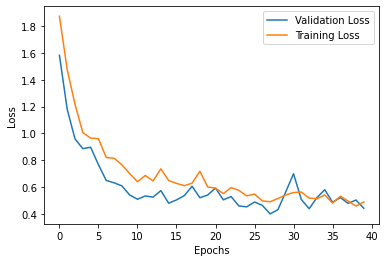

In [272]:
plt.plot(h['val_loss'],label="Validation Loss")
plt.plot(h['loss'],label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

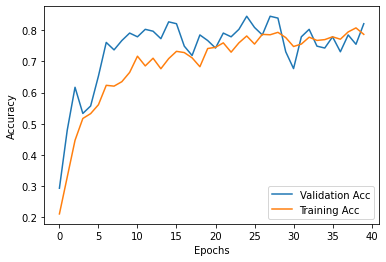

In [273]:
plt.plot(h['val_accuracy'],label="Validation Acc")
plt.plot(h['accuracy'],label="Training Acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [274]:
model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.4512 - accuracy: 0.8286 - lr: 0.0050


[0.45118728280067444, 0.8285714387893677, 0.004999999888241291]

In [275]:
model.evaluate(X_train,y_train)

30/30 [==============================] - 0s 601us/step - loss: 0.4184 - accuracy: 0.8392 - lr: 0.0050


[0.4184444844722748, 0.8391906023025513, 0.004999999888241291]